In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from app.styles import Estilos, colores
import matplotlib.dates as mdates
from matplotlib import font_manager as fm
from PIL import Image
#print(os.getcwd())
os.chdir('/home/richard/TRABAJO/BitcoinResearch/scripts/analisis')
print(os.getcwd())


/home/richard/TRABAJO/BitcoinResearch/scripts/analisis


In [2]:
aux = np.load('/home/richard/Escritorio/datos/database.npz', allow_pickle='TRUE')
n_block = aux['n_block']
time_b = aux['time_b']
size = aux['size']
ntx = aux['ntx']
bits = aux['bits']
chainwork = aux['chainwork']
strippedsize = aux['strippedsize']
weight = aux['weight']
total = aux['total']


In [3]:
FECHAS = pd.to_datetime(time_b)
print(FECHAS[2]) 
print(type(FECHAS))
print(type(FECHAS[2]))

2009-01-09 03:02:53
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


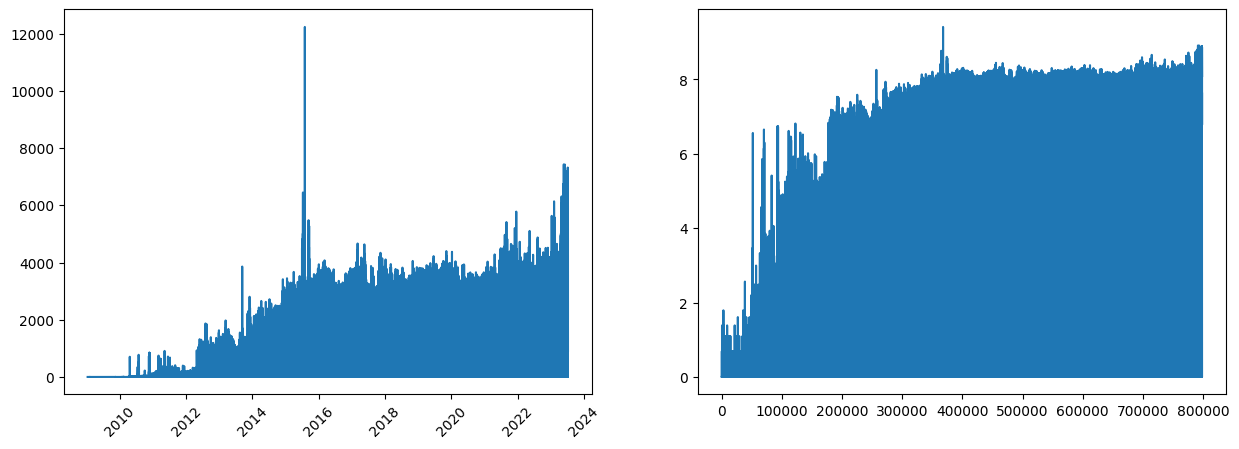

In [14]:
#===========NTX VS FECHAS

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FECHAS,ntx,label="transacciones  vs tiempo")
plt.xticks(rotation=45)

#============NTX VS N_BLOCK
plt.subplot(1,2,2)
indice=np.where((ntx==np.max(ntx)))[0][0]
ntx_max=ntx[indice]

indice2=np.where((ntx==np.min(ntx)))[0][0]
ntx_min=ntx[indice]

#plt.scatter(n_block[indice], ntx_max, color ='blue',label='Máximo', s=20)
#plt.scatter(n_block[indice2], ntx_min, color ='orange',label='Minimo', s=20)
plt.plot(n_block,np.log(ntx) ,label="numero de trans, por bloque")#, s=0.1,alpha=0.8)

plt.show()


3813419
0.008333332240700679


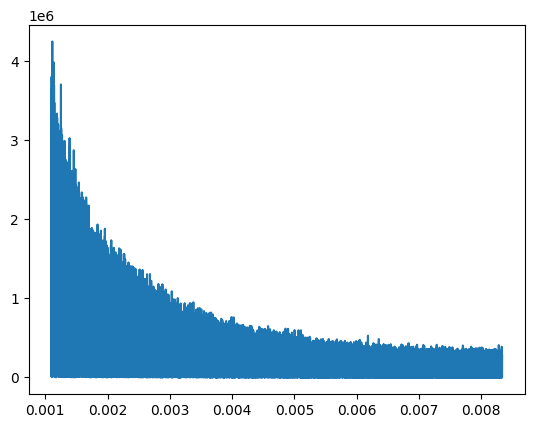

In [40]:
tiempo_segundos=(FECHAS-FECHAS[0]).total_seconds()
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo

tiempo_equiespaciado=np.arange(tiempo_segundos[0],tiempo_segundos[-1],60)
#creamos tiempos equiespaciados
ntx_interpolado=np.interp(tiempo_equiespaciado,tiempo_segundos,ntx)
#interpolamos las transacciones
transformada=np.fft.fft(ntx_interpolado)
#trabajamos las trans interpoladas
frecuencias=np.fft.fftfreq(len(ntx_interpolado),d=(60))
#TTF=transformada[transformada>0]
FRE=frecuencias[frecuencias>0]
print(len(FRE))
print(np.max(FRE))
#plt.plot(frecuencias[11000:], np.abs(transformada[11000:]), color='r')
plt.plot(FRE[500000:],np.abs(transformada[500000:3813419]))#, np.abs(transformada[11000:]), color='r')
#print(len(transformada))
#print(len(ntx_interpolado))
#print(tiempo_segundos[0]-tiempo_segundos[-1])
#print(tiempo_segundos[2])

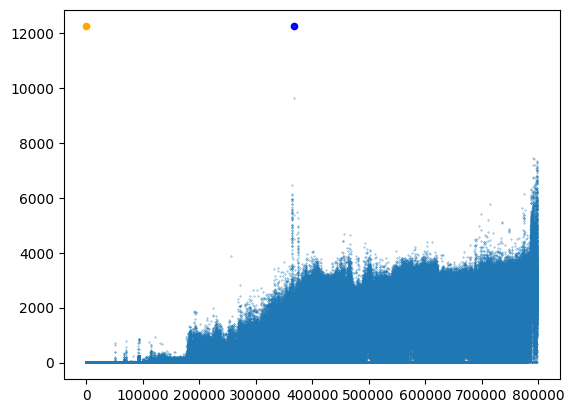

In [30]:
#=======NTX VS N_BLOCKS
fig, ax = plt.subplots()
indice=np.where((ntx==np.max(ntx)))[0][0]
ntx_max=ntx[indice]

indice2=np.where((ntx==np.min(ntx)))[0][0]
ntx_min=ntx[indice]


ax.scatter(n_block[indice], ntx_max, color ='blue',label='Máximo', s=20)
ax.scatter(n_block[indice2], ntx_min, color ='orange',label='Minimo', s=20)
ax.scatter(n_block,ntx ,label="numero de trans, por bloque", s=0.1,alpha=0.8)

399133
798268
798268
399123
399124
0.0131409501570901 0.013139697444968356
399133 ACA
399135


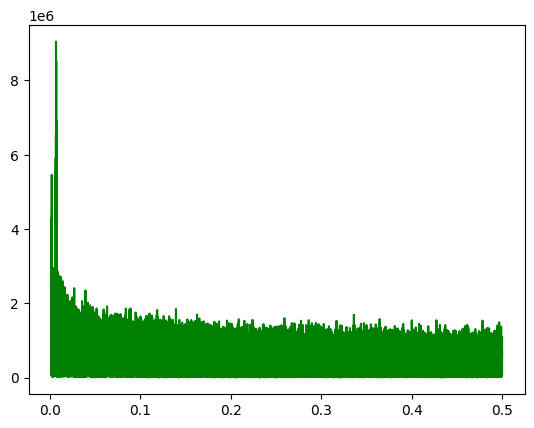

In [3]:
#=======TRANFORMADA SIN INTERPOLACION=======

tiempo_segundosT=(n_block[:]-n_block[0])

transformadaT=np.fft.fft(ntx[:])

frecuenciasT=np.fft.fftfreq(len(ntx[:]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))

FREK4=frecuenciasT[frecuenciasT>0]
print(len(FREK4))

print(len(transformadaT[:]))

plt.plot(FREK4[1000:], np.abs(transformadaT[1000:399133]), color='g')
print(len(frecuenciasT))
print(np.argmax(frecuenciasT[10:]))
print(np.argmin(frecuenciasT[10:]))
print(frecuenciasT[10490],frecuenciasT[10489])
print(len(FREK4),'ACA')
print(len(frecuenciasT[399133:]))

84133
168268


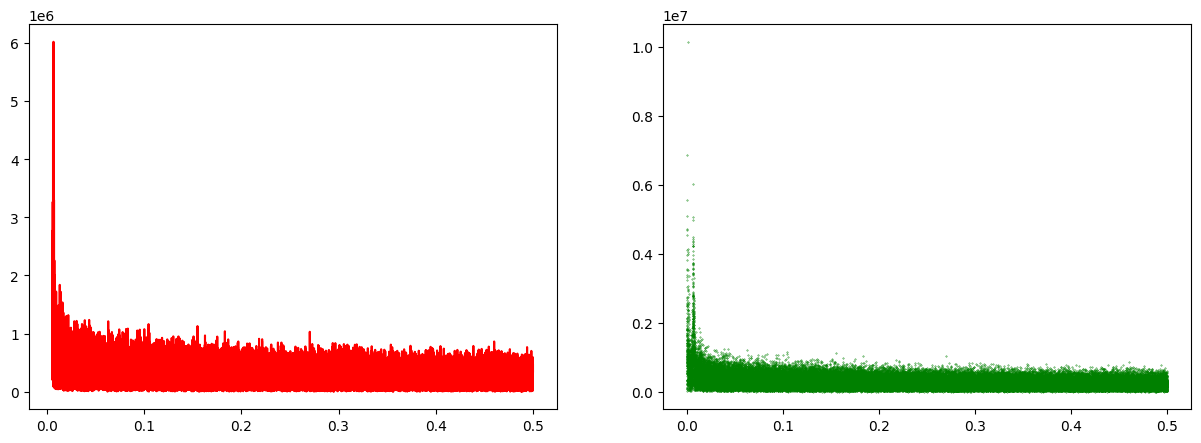

In [46]:
tiempo_segundosT=(n_block[630000:]-n_block[630000])

transformadaT=np.fft.fft(ntx[630000:])

frecuenciasT=np.fft.fftfreq(len(ntx[630000:]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))

FREK4=frecuenciasT[frecuenciasT>0]
print(len(FREK4))

print(len(transformadaT[:]))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FREK4[1000:], np.abs(transformadaT[1000:84133]), color='r')
plt.subplot(1,2,2)
plt.scatter(FREK4[10:], np.abs(transformadaT[10:84133]), color='g',s=0.1)

84133
168268


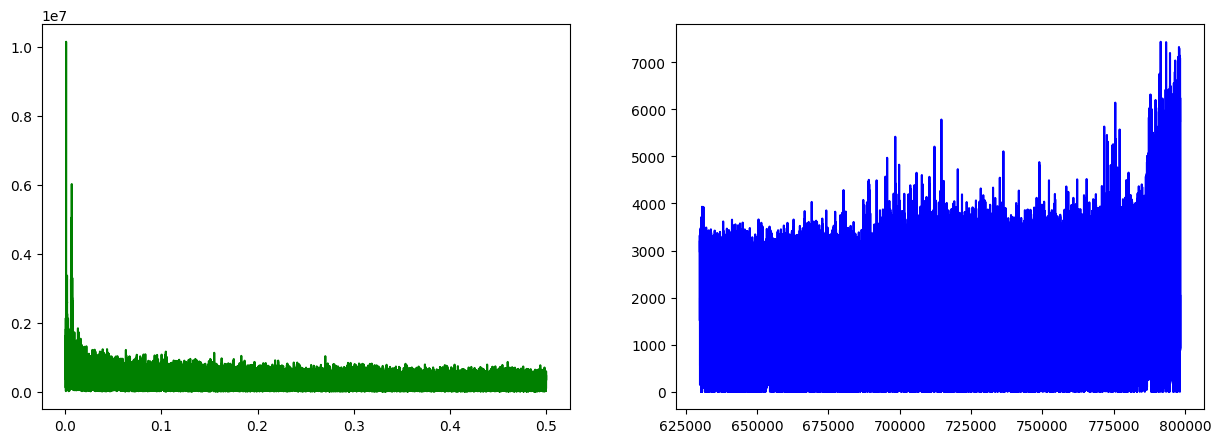

In [11]:
tiempo_segundosT=(n_block[630000:]-n_block[630000])

transformadaT=np.fft.fft(ntx[630000:])

frecuenciasT=np.fft.fftfreq(len(ntx[630000:]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))

FREK4=frecuenciasT[frecuenciasT>0]
print(len(FREK4))

print(len(transformadaT[:]))

#plt.plot(FREK4[100:], np.abs(transformadaT[100:10499]), color='g')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FREK4[100:], np.abs(transformadaT[100:84133]), color='g')
plt.subplot(1,2,2)
#plt.scatter(n_block[42000:63000],ntx[42000:63000],color='b',s=0.2)
plt.plot(n_block[630000:],ntx[630000:],color='b')


104999
210000


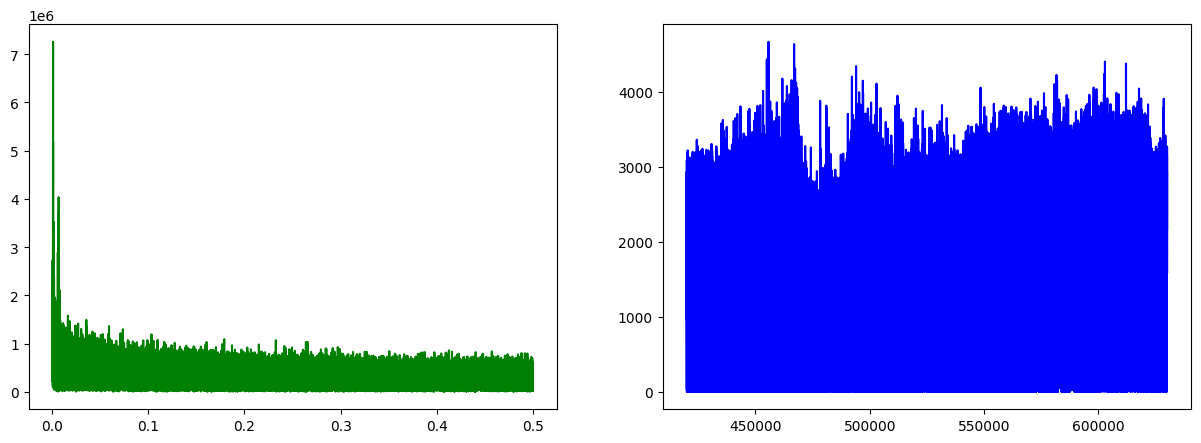

In [15]:
tiempo_segundosT=(n_block[420000:630000]-n_block[420000])

transformadaT=np.fft.fft(ntx[420000:630000])

frecuenciasT=np.fft.fftfreq(len(ntx[420000:630000]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))

FREK4=frecuenciasT[frecuenciasT>0]
print(len(FREK4))

print(len(transformadaT[:]))

#plt.plot(FREK4[100:], np.abs(transformadaT[100:10499]), color='g')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FREK4[100:], np.abs(transformadaT[100:104999]), color='g')
plt.subplot(1,2,2)
#plt.scatter(n_block[42000:63000],ntx[42000:63000],color='b',s=0.2)
plt.plot(n_block[420000:630000],ntx[420000:630000],color='b')


104999
210000


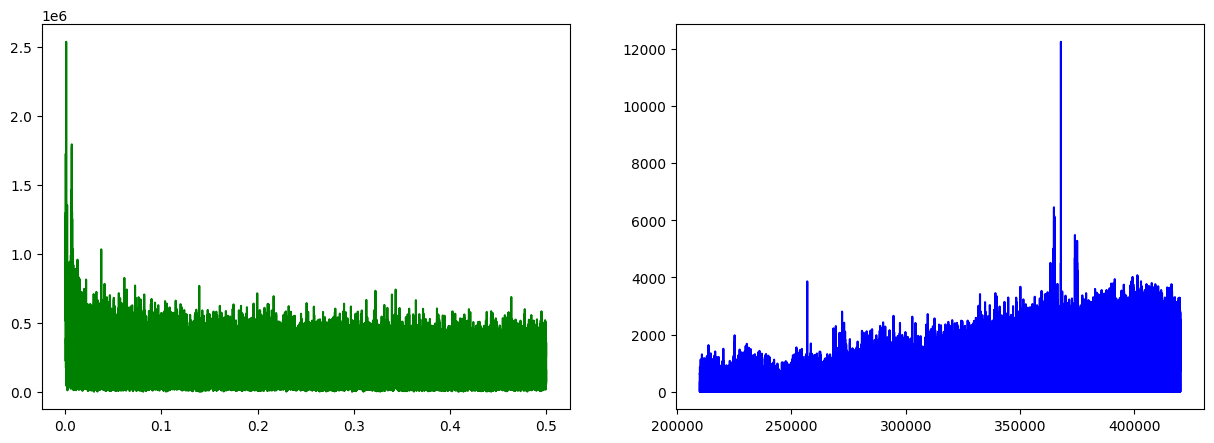

In [5]:
tiempo_segundosT=(n_block[210000:420000]-n_block[210000])

transformadaT=np.fft.fft(ntx[210000:420000])

frecuenciasT=np.fft.fftfreq(len(ntx[210000:420000]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))

FREK4=frecuenciasT[frecuenciasT>0]
print(len(FREK4))

print(len(transformadaT[:]))

#plt.plot(FREK4[10:], np.abs(transformadaT[10:10499]), color='g')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FREK4[100:], np.abs(transformadaT[100:104999]), color='g')
plt.subplot(1,2,2)
plt.plot(n_block[210000:420000],ntx[210000:420000],color='b')

104999
210000


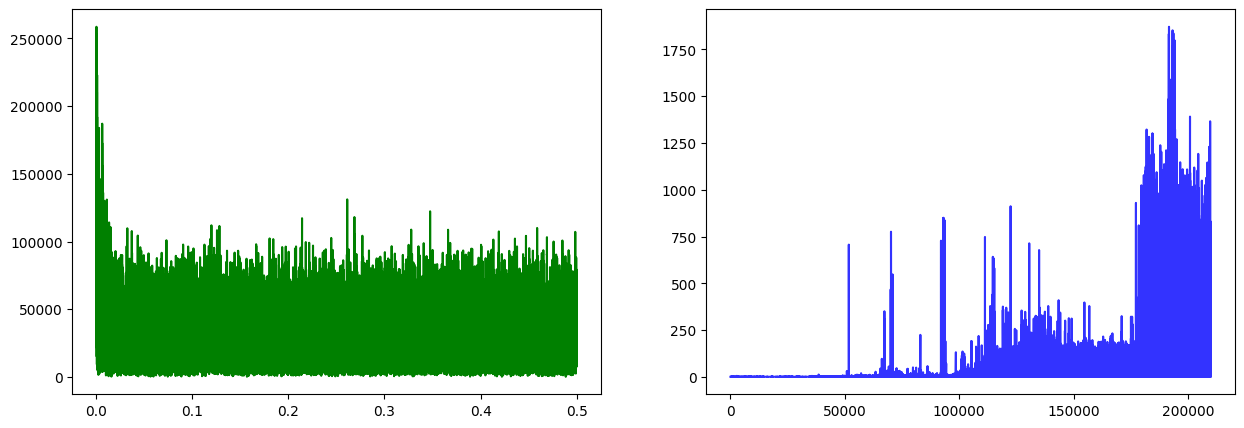

In [6]:
tiempo_segundosT=(n_block[:210000]-n_block[0])

transformadaT=np.fft.fft(ntx[:210000])

frecuenciasT=np.fft.fftfreq(len(ntx[:210000]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))

FREK4=frecuenciasT[frecuenciasT>0]
print(len(FREK4))

print(len(transformadaT[:]))
#plt.plot(FREK4[10:], transformadaT[10:10499], color='r')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FREK4[100:], np.abs(transformadaT[100:104999]), color='g')
plt.subplot(1,2,2)
plt.plot(n_block[0:210000],ntx[0:210000],color='b',alpha=0.8)


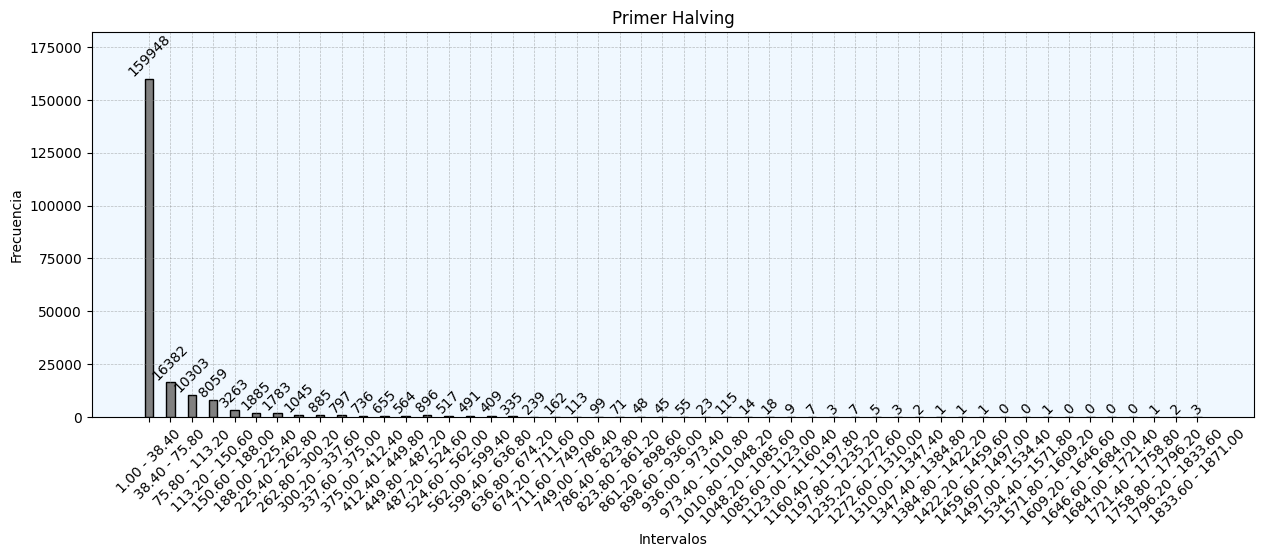

In [26]:
# print(max(ntx[:21000]))
# print(len(ntx[:]))
# print(np.argmax(ntx))
# print(np.argmax(ntx[:210]),'ACA')
# print(time_b[367852])
# print(np.mean(ntx[:210000]),'PROMEDIO')
plt.figure(figsize=(15, 5))
hist, edges = np.histogram(ntx[:210001],bins=50)

#plt.bar(range(0, 50), hist, color='g',width=0.4)
plt.bar(range(0, 50), hist, color='gray',edgecolor='black',width=0.4)

for i, freq in enumerate(hist):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=10, color='black',rotation=45)
interval_labels = [f'{edges[i]:.2f} - {edges[i+1]:.2f}' for i in range(len(edges)-1)]
plt.xticks(range(50), interval_labels,rotation=45 )

plt.xlabel('Intervalos')
plt.ylim(0,182000)
plt.ylabel('Frecuencia')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Primer Halving')
#FONDO 
plt.gcf().set_facecolor('white')
#FONDO DENTRO LA GRAFICA
plt.gca().set_facecolor('aliceblue')

plt.show()

628.7960771615374 PROMEDIO


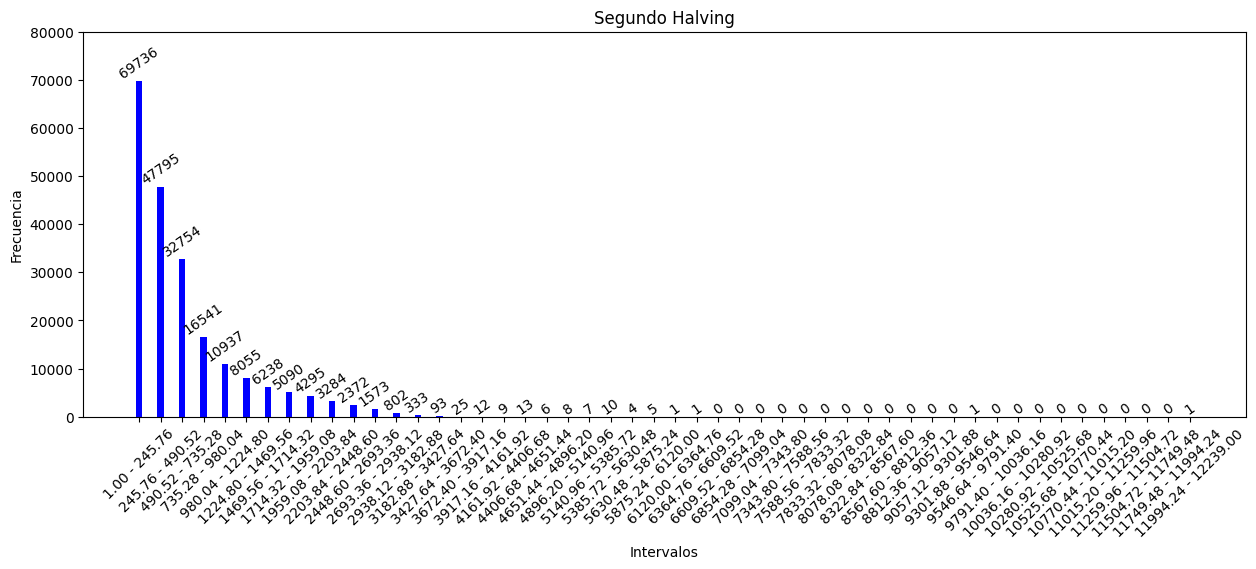

In [30]:
print(np.mean(ntx[210000:420001]),'PROMEDIO')
plt.figure(figsize=(15, 5))
hist, edges = np.histogram(ntx[210000:420001],bins=50)

plt.bar(range(0, 50), hist, color='b',width=0.3)

for i, freq in enumerate(hist):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=10, color='black',rotation=35)
interval_labels = [f'{edges[i]:.2f} - {edges[i+1]:.2f}' for i in range(len(edges)-1)]
plt.xticks(range(50), interval_labels,rotation=45 )

plt.xlabel('Intervalos')
plt.ylim(0,80000)
plt.ylabel('Frecuencia')
plt.title('Segundo Halving')
plt.show()


1846.2079466288255 PROMEDIO


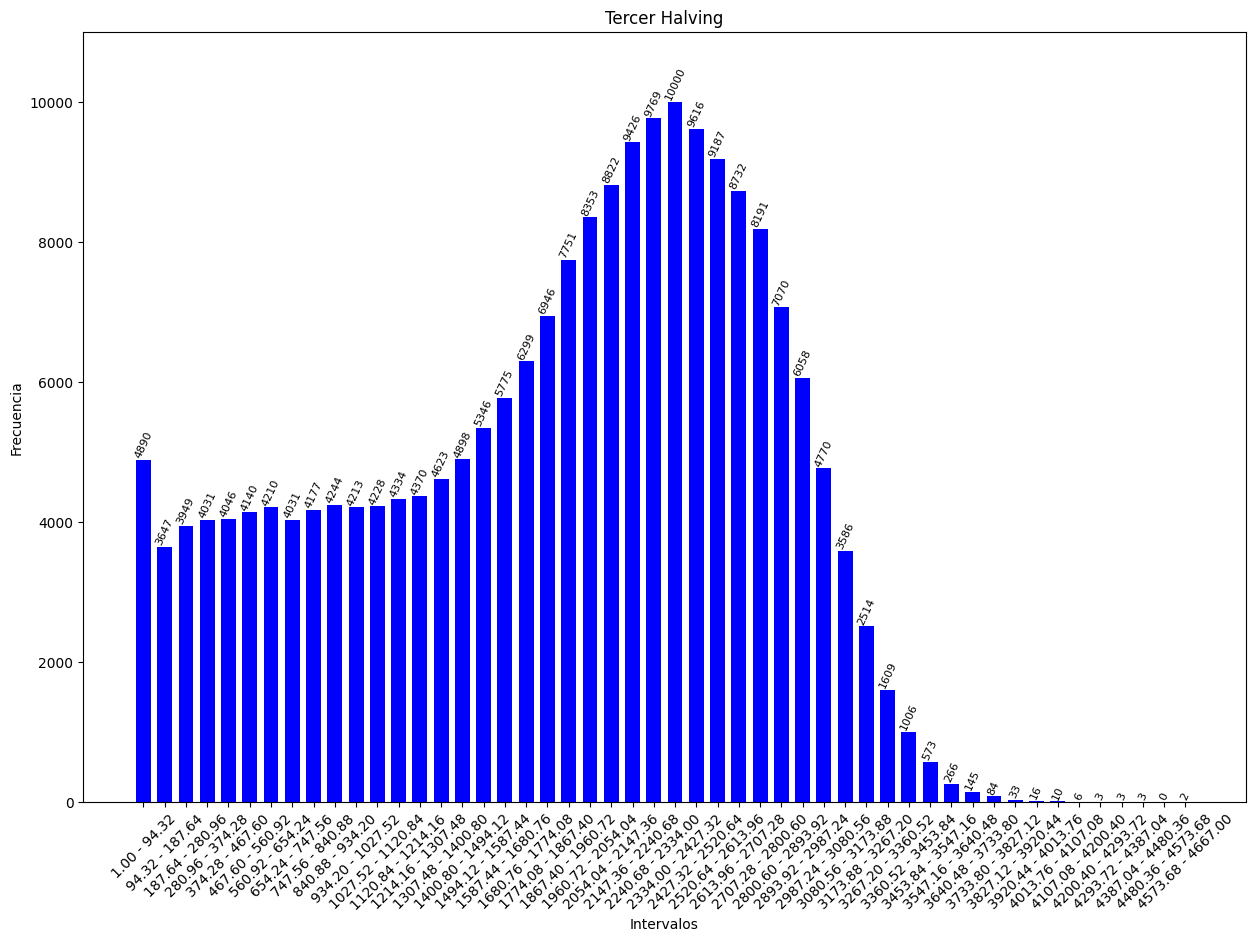

In [26]:
print(np.mean(ntx[420000:630001]),'PROMEDIO')
plt.figure(figsize=(15, 10))
hist, edges = np.histogram(ntx[420000:630001],bins=50)

plt.bar(range(0, 50), hist, color='b',width=0.7)

for i, freq in enumerate(hist):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=8, color='black',rotation=65)
interval_labels = [f'{edges[i]:.2f} - {edges[i+1]:.2f}' for i in range(len(edges)-1)]
plt.xticks(range(50), interval_labels,rotation=45 )

plt.xlabel('Intervalos')
plt.ylim(0,11000)
plt.ylabel('Frecuencia')
plt.title('Tercer Halving')
plt.show()


2112.0 PROMEDIO
3228.4206349206347 PROMEDIO


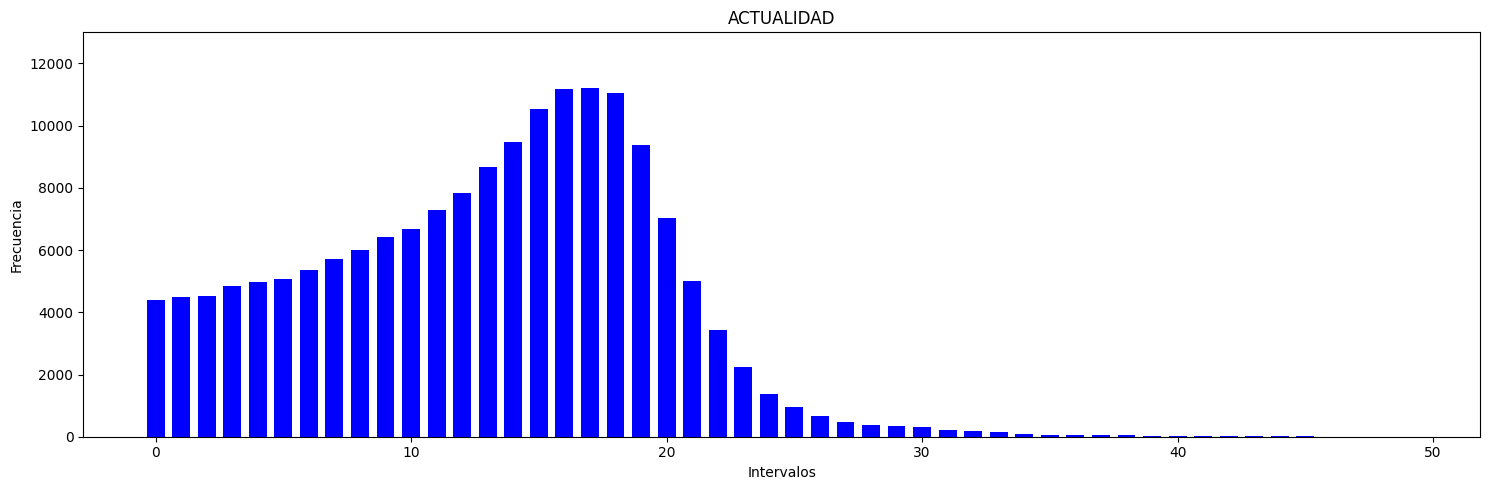

In [14]:

plt.figure(figsize=(15, 5))
hist, edges = np.histogram(ntx[630000:],bins=50)
print(np.median(ntx[630000:]),'PROMEDIO')
print(np.mean(ntx[-1008:]),'PROMEDIO')

plt.bar(range(0, 50), hist, color='b',width=0.7)

# for i, freq in enumerate(hist):
#     plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=9, color='black',rotation=55)
# interval_labels = [f'{edges[i]:.2f} - {edges[i+1]:.2f}' for i in range(len(edges)-1)]
# plt.xticks(range(50), interval_labels,rotation=45 )

plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.ylim(0,13000)
plt.title('ACTUALIDAD')
plt.tight_layout()
plt.show()

2112.0 PROMEDIO
3228.4206349206347 PROMEDIO


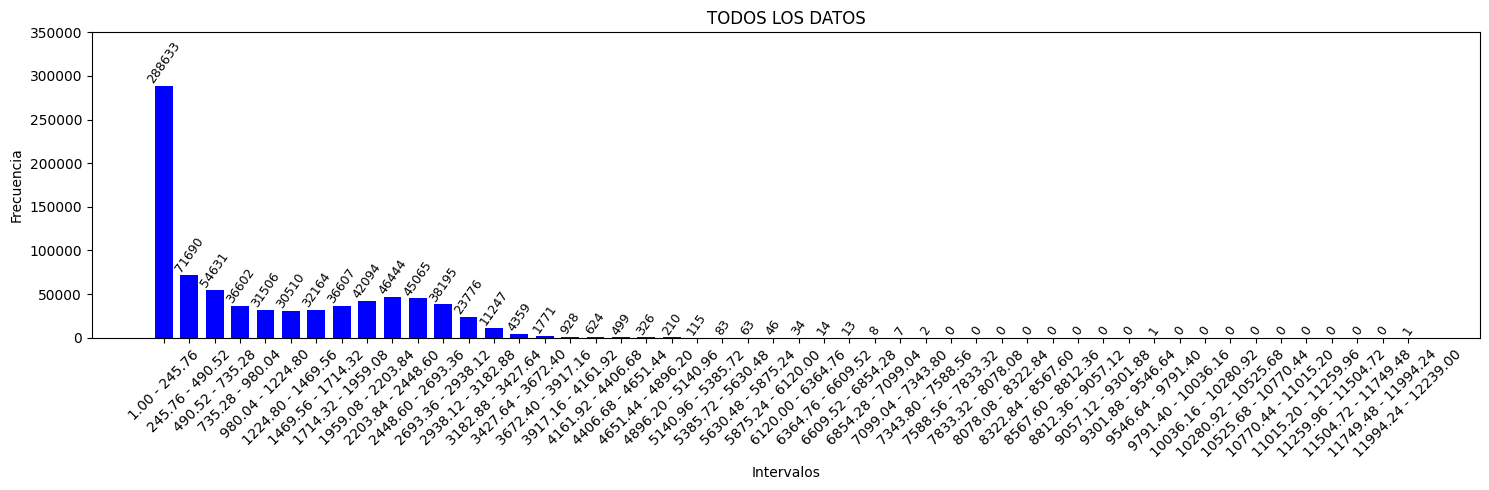

In [13]:
plt.figure(figsize=(15, 5))
hist, edges = np.histogram(ntx[:],bins=50)
print(np.median(ntx[630000:]),'PROMEDIO')
print(np.mean(ntx[-1008:]),'PROMEDIO')

plt.bar(range(0, 50), hist, color='b',width=0.7)

for i, freq in enumerate(hist):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=9, color='black',rotation=55)
interval_labels = [f'{edges[i]:.2f} - {edges[i+1]:.2f}' for i in range(len(edges)-1)]
plt.xticks(range(50), interval_labels,rotation=45 )

plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.ylim(0,350000)
plt.title('TODOS LOS DATOS')
plt.tight_layout()
plt.show()

/tmp/ipykernel_6341/3320388424.py:31: RuntimeWarning: divide by zero encountered in log
  ax[0,0].bar(range(0,50),np.log(hist),color=Estilos[tipo][0],width=0.7)


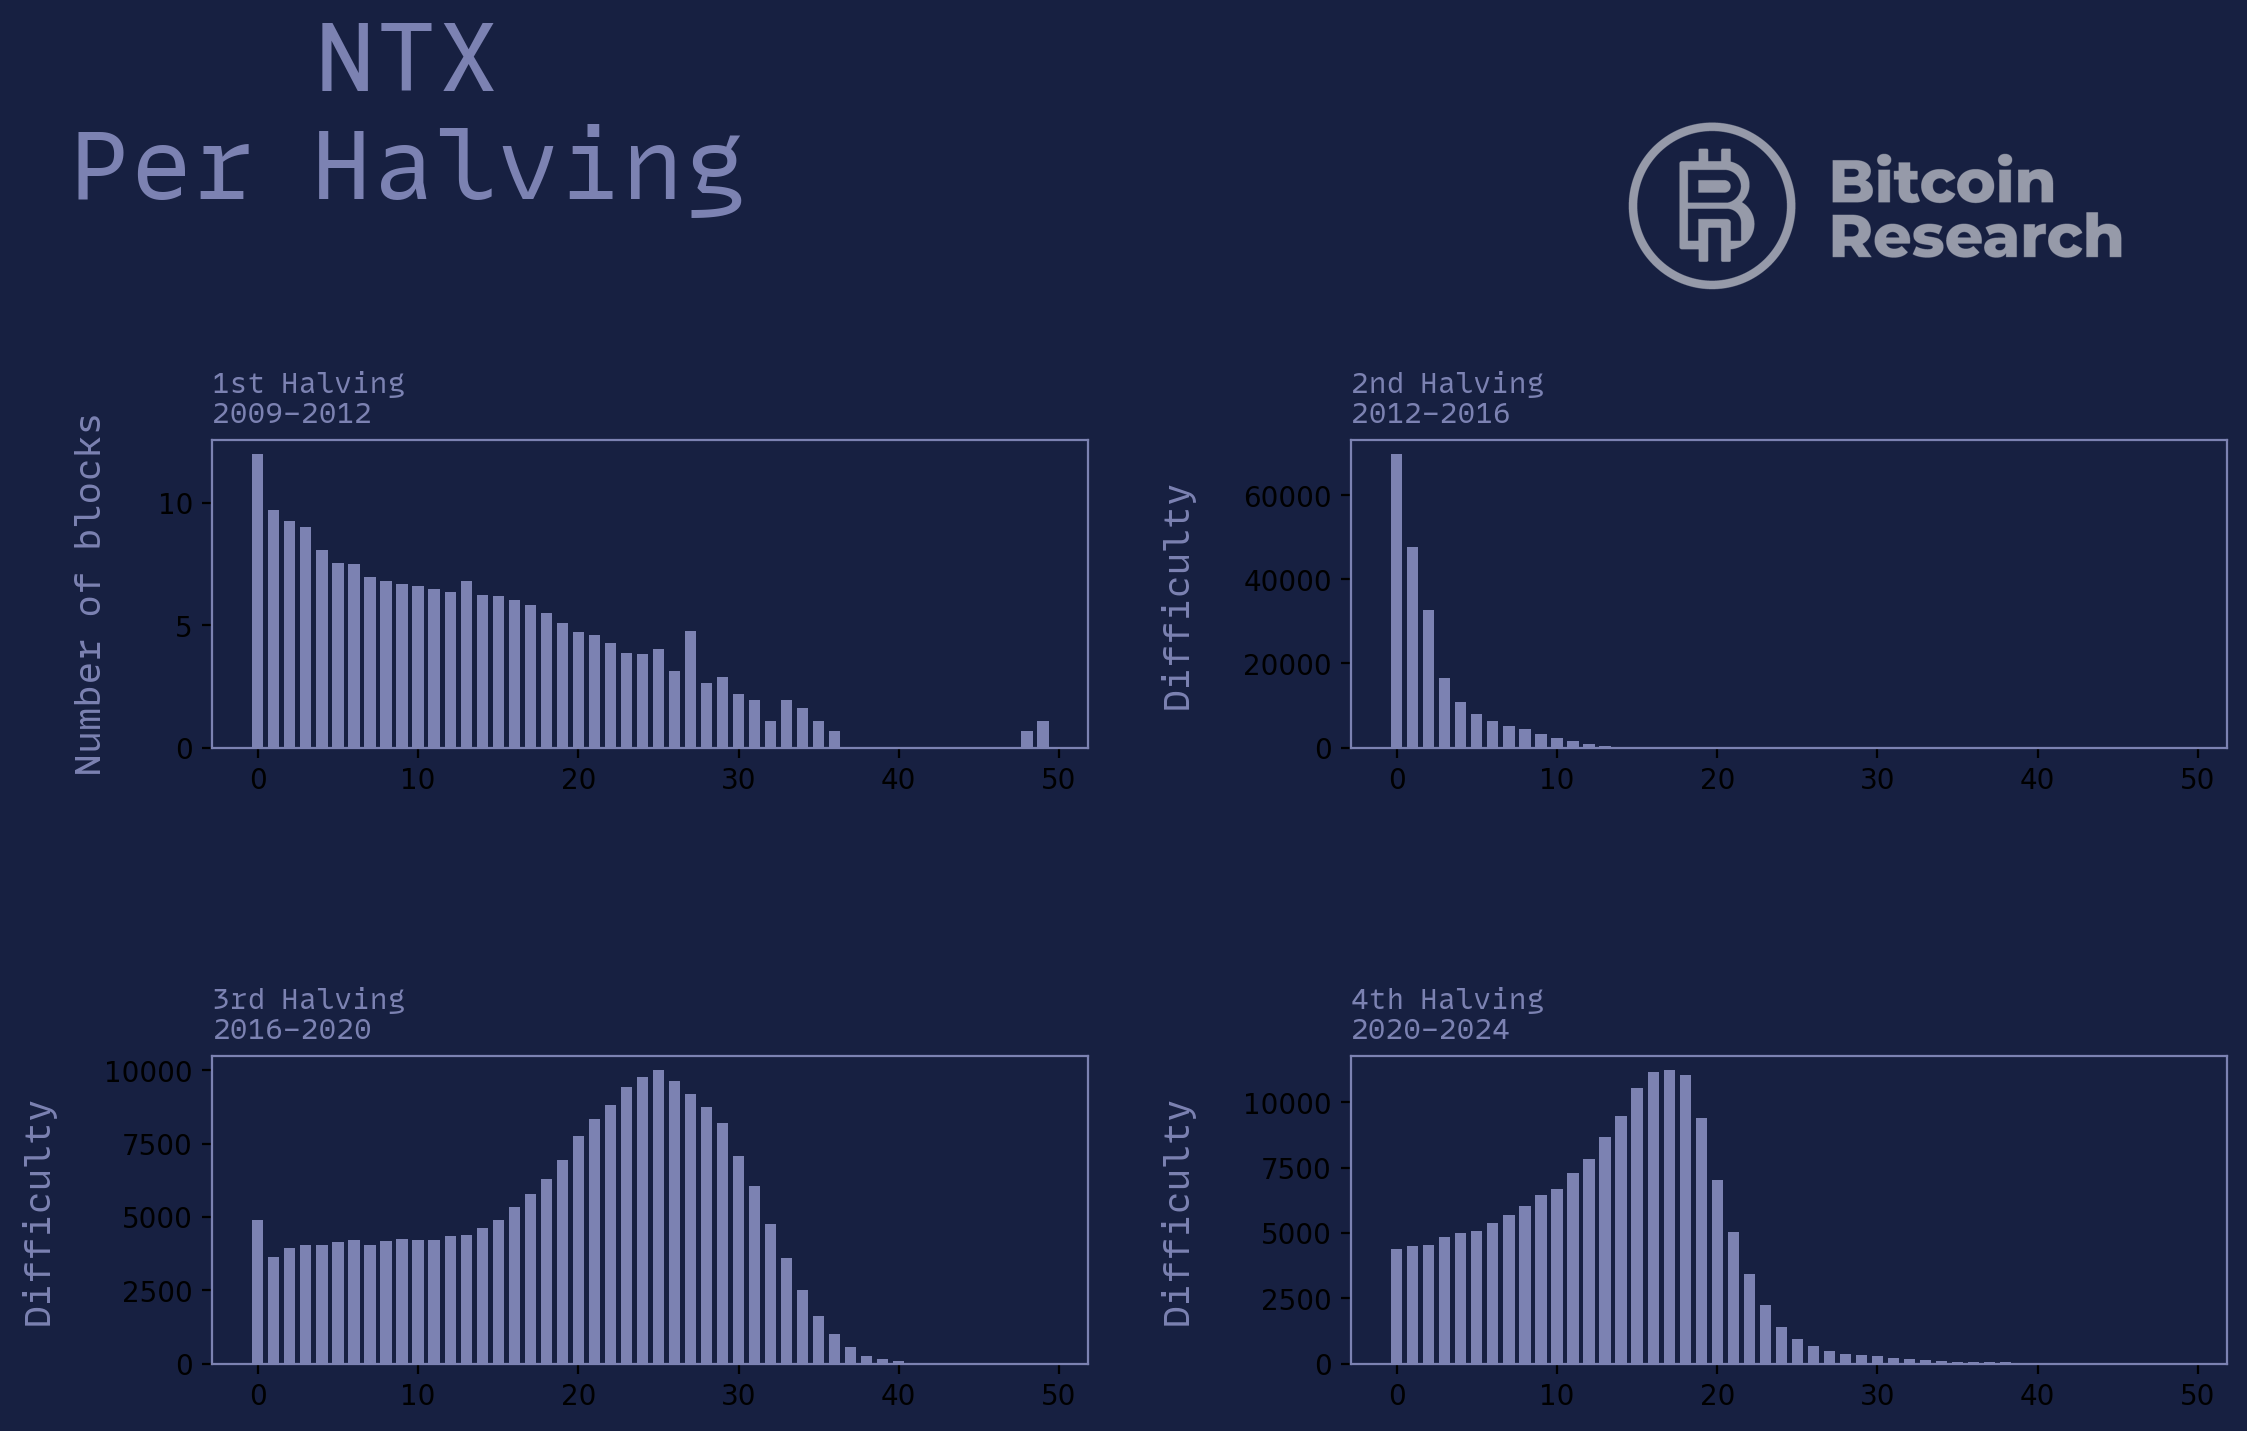

In [15]:
fig, ax = plt.subplots(2,2,figsize=(13,6), dpi=200)
tipo='estilo_dark'
fpath = os.path.join('/home/richard/TRABAJO/BitcoinResearch/scripts/bins/MonoLisaSimpson.ttf')
prop = fm.FontProperties(fname=fpath)
fig.patch.set_facecolor(Estilos[tipo][1])

ax[0,0].patch.set_facecolor(Estilos[tipo][1])
ax[0,1].patch.set_facecolor(Estilos[tipo][1])
ax[1,0].patch.set_facecolor(Estilos[tipo][1])
ax[1,1].patch.set_facecolor(Estilos[tipo][1])


preferencias = {'color':Estilos[tipo][0],'fontproperties':prop}

plt.suptitle("NTX\nPer Halving",fontsize=35,x=0.20,y=1.23,**preferencias)


for spine in ax[0,0].spines.values():
    spine.set_color(Estilos[tipo][0])
for spine in ax[0,1].spines.values():
    spine.set_color(Estilos[tipo][0])
for spine in ax[1,0].spines.values():
    spine.set_color(Estilos[tipo][0])
for spine in ax[1,1].spines.values():
    spine.set_color(Estilos[tipo][0])


#ax[0,0].plot(time_1,difficulty_1,color=colores[3],zorder=1)
hist, edges = np.histogram(ntx[:210000],bins=50)
ax[0,0].bar(range(0,50),hist,color=Estilos[tipo][0],width=0.7)
ax[0,0].set_ylabel('Number of blocks\n', fontsize=13,**preferencias)
#ax[1,0].set_xlabel('NTX\n', fontsize=13,**preferencias)
#ax[0,0].set_yscale('log')

hist, edges = np.histogram(ntx[210000:420000],bins=50)
ax[0,1].bar(range(0,50),hist,color=Estilos[tipo][0],width=0.7)
ax[0,1].set_ylabel('Number of blocks\n', fontsize=13,**preferencias)
#ax[0,1].set_yscale('log')
hist, edges = np.histogram(ntx[420000:630000],bins=50)
ax[1,0].bar(range(0,50),hist,color=Estilos[tipo][0],width=0.7)
ax[1,0].set_ylabel('Number of blocks\n', fontsize=13,**preferencias)
#ax[1,0].set_yscale('log')
hist, edges = np.histogram(ntx[630000:],bins=50)
ax[1,1].bar(range(0,50),hist,color=Estilos[tipo][0],width=0.7)
ax[1,1].set_ylabel('Number of blocks\n', fontsize=13,**preferencias)
#ax[1,1].set_yscale('log')

ax[0,0].set_title("1st Halving\n2009-2012  ",fontsize=25,loc='left', **preferencias)
ax[0,1].set_title("2nd Halving\n2012-2016  ",fontsize=25,loc='left', **preferencias)
ax[1,0].set_title("3rd Halving\n2016-2020",fontsize=25,loc='left', **preferencias)
ax[1,1].set_title("4th Halving\n2020-2024",fontsize=25,loc='left', **preferencias)

# if tipo[7:8]=='d':
#     tw1 = Image.open('/home/richard/TRABAJO/BitcoinResearch/scripts/bins/br_w.png')
# else:
#     tw1 = Image.open('/home/richard/TRABAJO/BitcoinResearch/scripts/bins/br_d.png')

# total_diff = np.array([bits_to_difficulty(a)/10**12 for a in bits])
# me1 = 'All-time High: '+str(round(total_diff.max(),2))+' T'
# me2 = '\nLast Block '+str(last_block())+' : '+str(round(total_diff[-1],2))+' T'



# date = datetime(2013, 1, 1)
# x_value = mdates.date2num(date) 
# ax[0,0].text(x_value,1e10,me1+me2, color=Estilos[tipo][0], ha='right', va='center',size=13)

tw1 = Image.open('/home/richard/TRABAJO/BitcoinResearch/scripts/bins/br_w.png')
tw1_resized = tw1.resize((int(tw1.width * 0.5), int(tw1.height * 0.5)))  # Reduce el tamaño de la imagen a la mitad
tw1 = Image.open('/home/richard/TRABAJO/BitcoinResearch/scripts/bins/br_d.png')
# Convierte la imagen de PIL a una matriz de numpy para que matplotlib pueda trabajar con ella
tw1_array = np.array(tw1_resized)




fig.figimage(tw1_array, xo=1500, yo=850, alpha=0.55, zorder=1)
plt.subplots_adjust(wspace=0.3, hspace=1)
#plt.savefig('analisis/resultados/dificultad_halv_'+tipo+'.png',bbox_inches='tight',pad_inches=0.5)
plt.show()

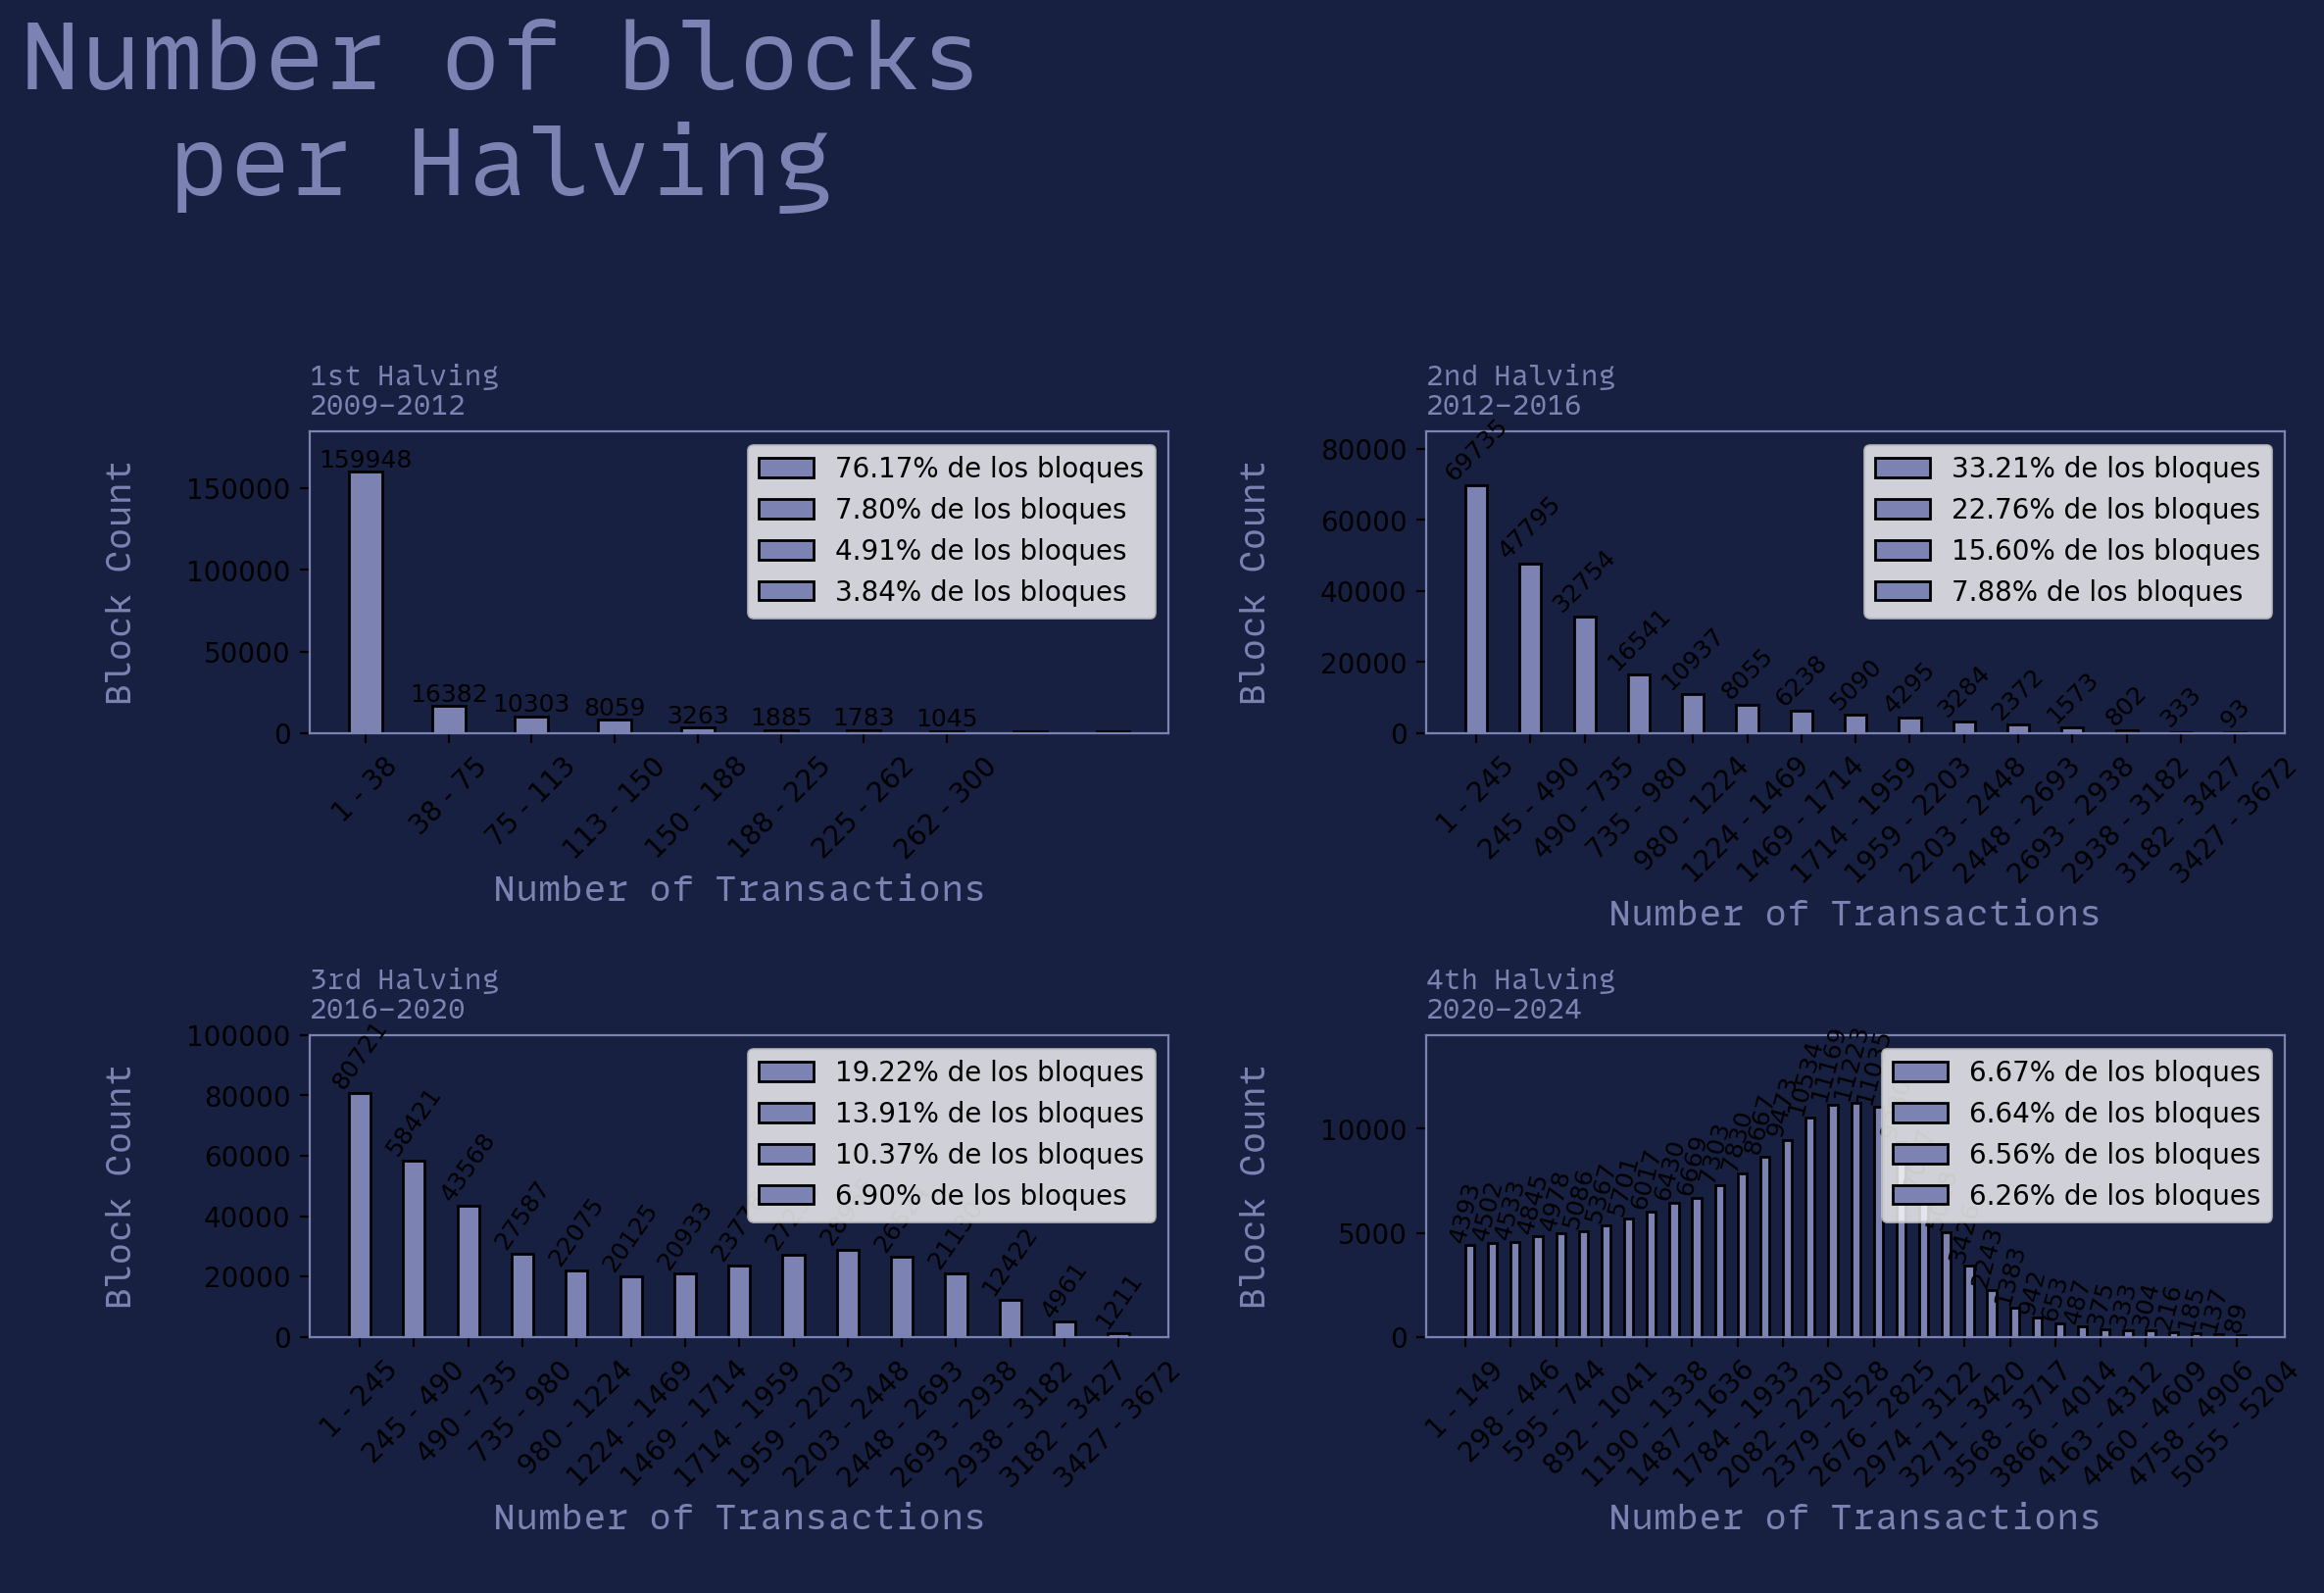

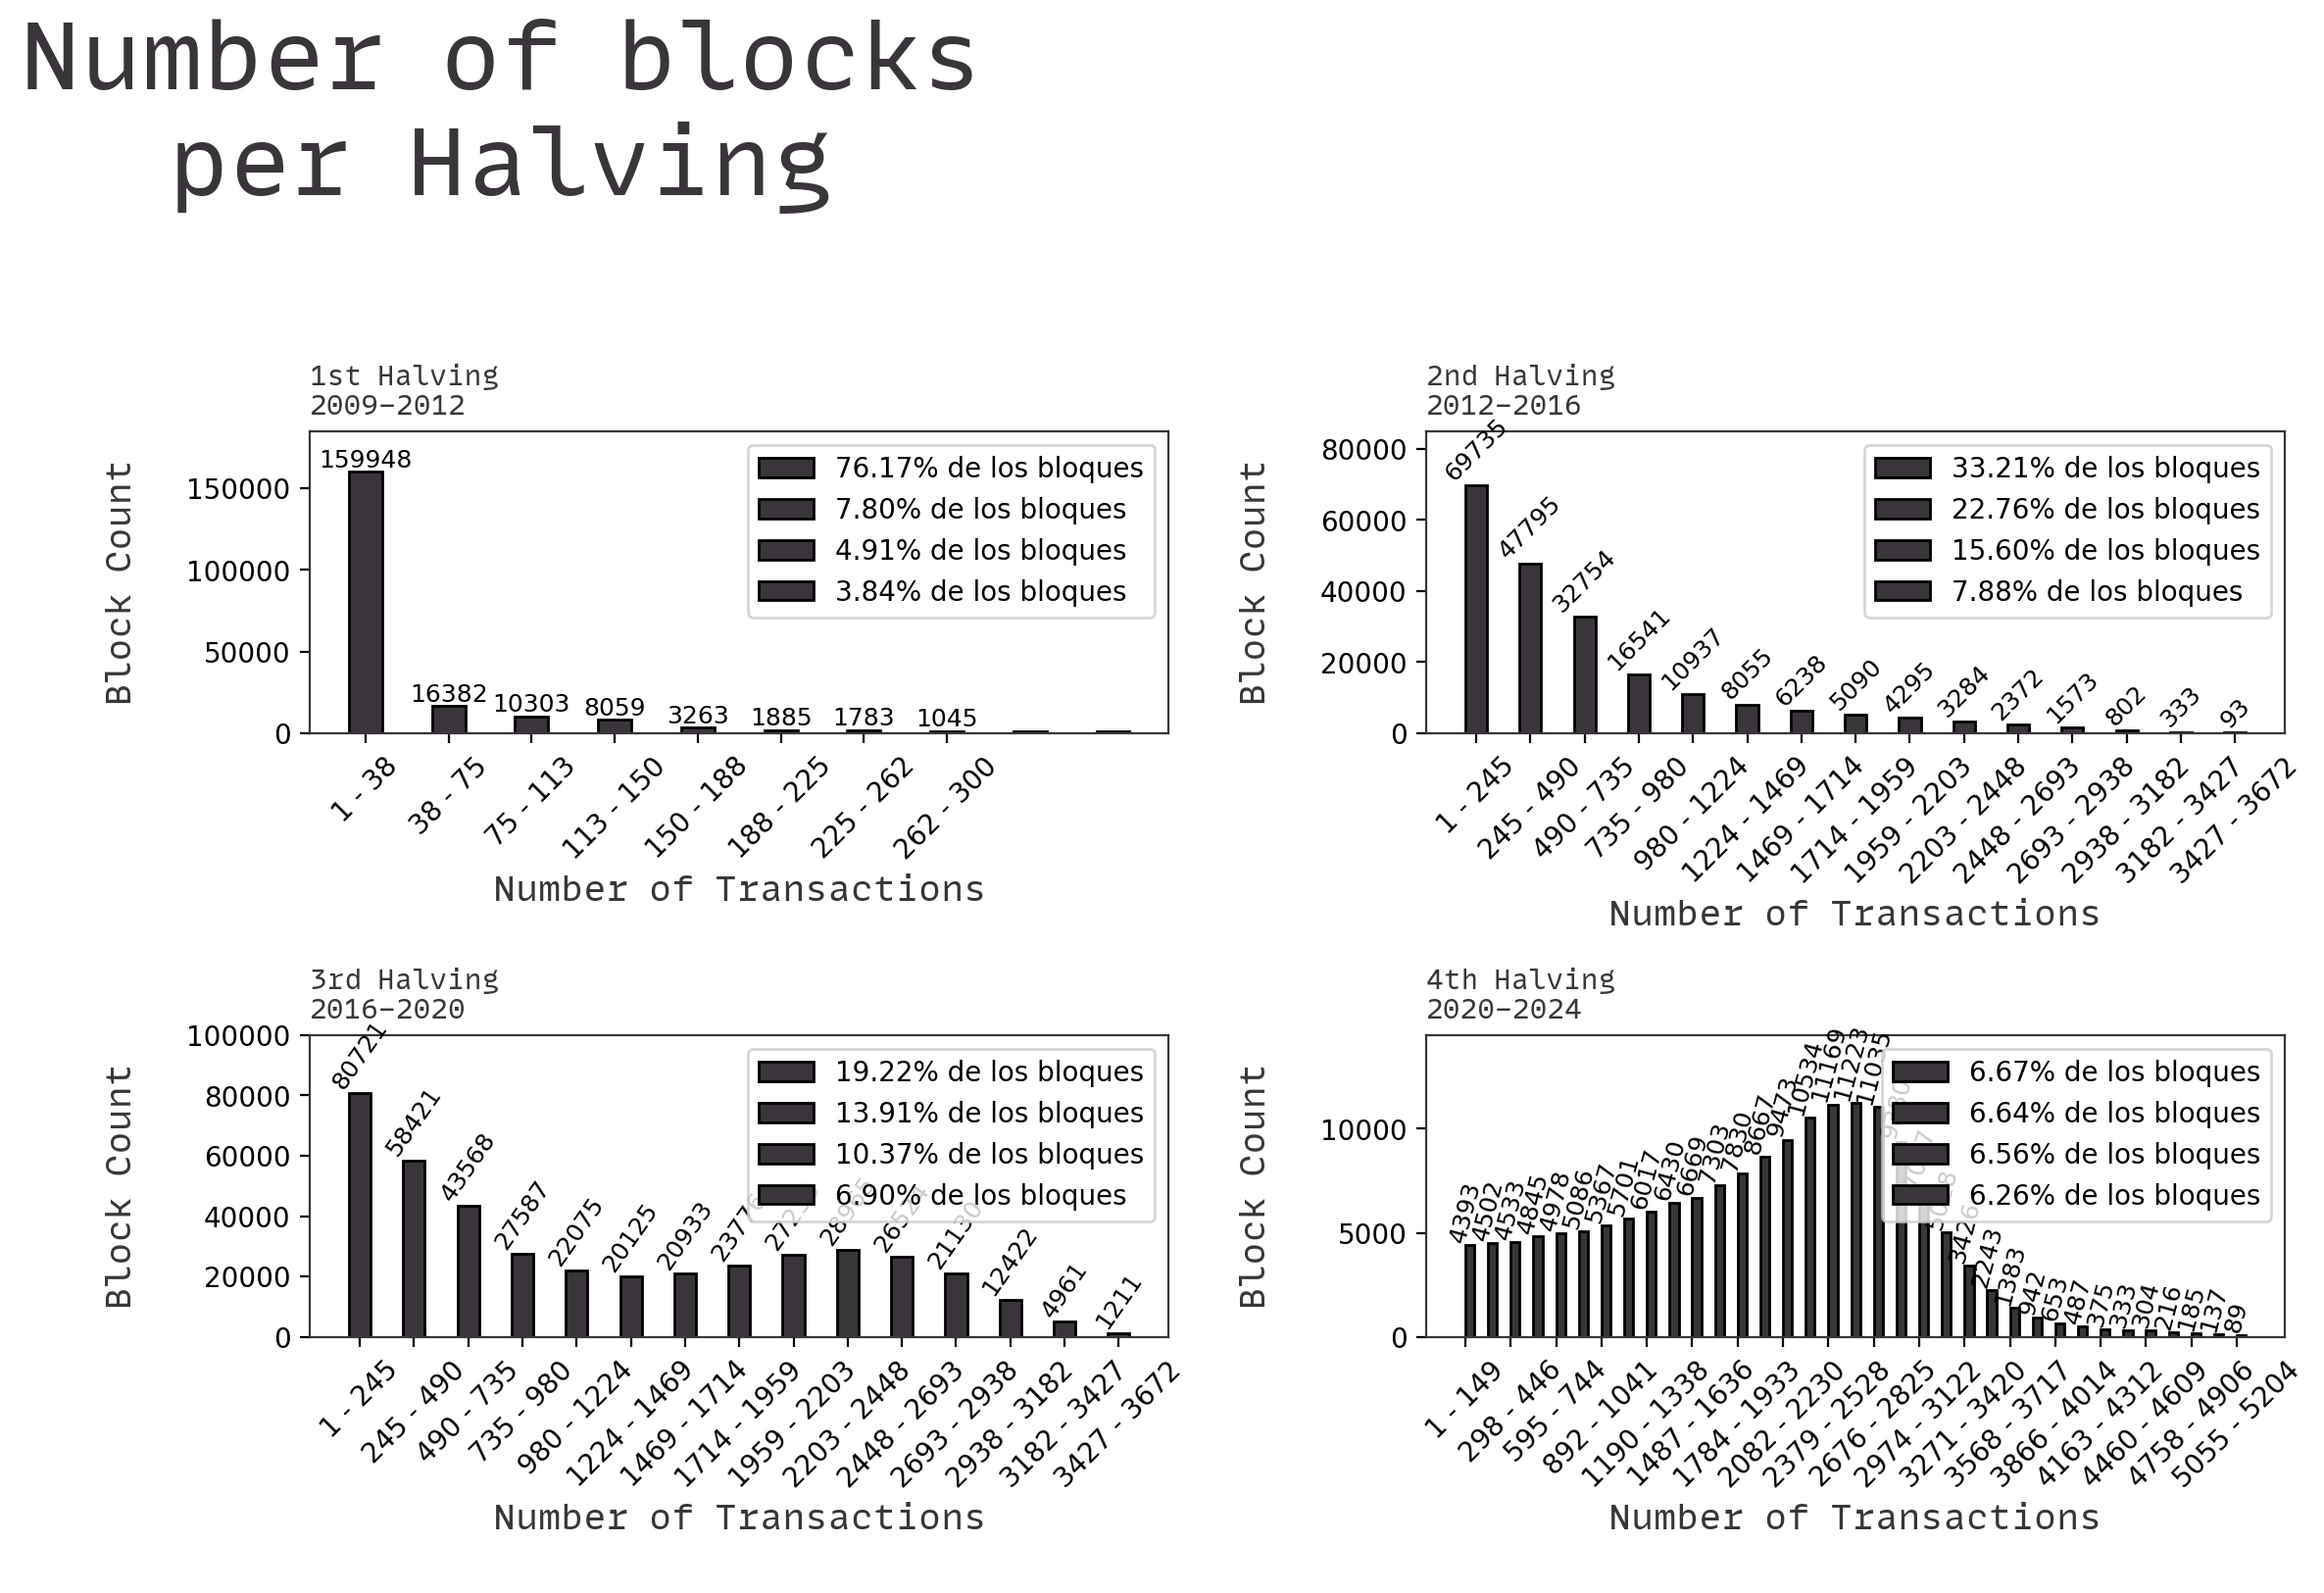

In [55]:

# Cambiar la tipografia
fpath = os.path.join('/home/richard/TRABAJO/BitcoinResearch/scripts/bins/MonoLisaSimpson.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]


def crear_imagen_h(tipo='estilo_dark'):

    fig, ax = plt.subplots(2,2,figsize=(13,6), dpi=200)

    fig.patch.set_facecolor(Estilos[tipo][1])
    ax[0,0].patch.set_facecolor(Estilos[tipo][1])
    ax[0,1].patch.set_facecolor(Estilos[tipo][1])
    ax[1,0].patch.set_facecolor(Estilos[tipo][1])
    ax[1,1].patch.set_facecolor(Estilos[tipo][1])


    preferencias = {'color':Estilos[tipo][0],'fontproperties':prop}

    plt.suptitle("Number of blocks\nper Halving",fontsize=35,x=0.20,y=1.23,**preferencias)
    #ntx,n_block = leer_data('ntx','n_block')


    for spine in ax[0,0].spines.values():
        spine.set_color(Estilos[tipo][0])
    for spine in ax[0,1].spines.values():
        spine.set_color(Estilos[tipo][0])
    for spine in ax[1,0].spines.values():
        spine.set_color(Estilos[tipo][0])
    for spine in ax[1,1].spines.values():
        spine.set_color(Estilos[tipo][0])
############################3
    ########
    hist, edges = np.histogram(ntx[:210000],bins=50)   
    HIST2=sorted(hist,reverse=True) 
    e=[]
    for i in HIST2[:10]:
        e.append(f'{(i/np.sum(hist))*100:.2f}')
    labels=[f'{x}% de los bloques'for x in e]

    ax[0,0].bar(range(0, 10), hist[:10], color=Estilos[tipo][0],edgecolor='black',width=0.4,tick_label=labels,label=labels)
    ax[0,0].set_ylabel('Block Count\n', fontsize=13,**preferencias)
    ax[0,0].set_xlabel('Number of Transactions\n', fontsize=13,**preferencias)
    for i, freq in enumerate(hist[:8]):
        ax[0,0].text(i, freq, str(freq), ha='center', va='bottom', fontsize=9, color='black', rotation=0)

    # Etiquetas de intervalos en el eje x
    interval_labels = [f'{int(edges[i])} - {int(edges[i+1])}' for i in range(len(edges)-1)]
    ax[0,0].set_xticks(range(0,8))
    ax[0,0].set_xticklabels(interval_labels[:8], rotation=45)
    ax[0,0].set_ylim(0,185000)
    legend = ax[0,0].legend(labels[:4], loc='upper right')
    plt.setp(legend.get_texts(), fontsize=10)

############
    hist, edges = np.histogram(ntx[210000:2*210000],bins=50)
    HIST2=sorted(hist,reverse=True)
    e=[]
    for i in HIST2[:15]:
        e.append(f'{(i/np.sum(hist))*100:.2f}')
    labels=[f'{x}% de los bloques'for x in e]    

    ax[0,1].bar(range(0, 15), hist[:15], color=Estilos[tipo][0],edgecolor='black',width=0.4,tick_label=labels,label=labels)
    ax[0,1].set_ylabel('Block Count\n', fontsize=13,**preferencias)
    ax[0,1].set_xlabel('Number of Transactions\n', fontsize=13,**preferencias)
    for i, freq in enumerate(hist[:15]):
        ax[0,1].text(i, freq, str(freq), ha='center', va='bottom', fontsize=9, color='black', rotation=45)

    # Etiquetas de intervalos en el eje x
    interval_labels = [f'{int(edges[i])} - {int(edges[i+1])}' for i in range(len(edges)-1)]
    ax[0,1].set_xticks(range(0,15))
    ax[0,1].set_xticklabels(interval_labels[:15], rotation=45)
    ax[0,1].set_ylim(0,85000)
    legend = ax[0,1].legend(labels[:4], loc='upper right')
    plt.setp(legend.get_texts(), fontsize=10)       
###################
    hist, edges = np.histogram(ntx[210000:3*210000],bins=50)
    HIST2=sorted(hist,reverse=True)
    e=[]
    for i in HIST2[:15]:
        e.append(f'{(i/np.sum(hist))*100:.2f}')
    labels=[f'{x}% de los bloques'for x in e]     
    ax[1,0].bar(range(0, 15), hist[:15], color=Estilos[tipo][0],edgecolor='black',width=0.4,tick_label=labels,label=labels)
    ax[1,0].set_ylabel('Block Count\n', fontsize=13,**preferencias)
    ax[1,0].set_xlabel('Number of Transactions\n', fontsize=13,**preferencias)
    for i, freq in enumerate(hist[:15]):
        ax[1,0].text(i, freq, str(freq), ha='center', va='bottom', fontsize=9, color='black', rotation=55)

    # Etiquetas de intervalos en el eje x
    interval_labels = [f'{int(edges[i])} - {int(edges[i+1])}' for i in range(len(edges)-1)]
    ax[1,0].set_xticks(range(0,15))
    ax[1,0].set_xticklabels(interval_labels[:15], rotation=45)
    ax[1,0].set_ylim(0,100000)
    legend = ax[1,0].legend(labels[:4], loc='upper right')
    plt.setp(legend.get_texts(), fontsize=10)  
#######################
    hist, edges = np.histogram(ntx[3*210000:],bins=50)
    HIST2=sorted(hist,reverse=True)
    e=[]
    for i in HIST2[:35]:
        e.append(f'{(i/np.sum(hist))*100:.2f}')
    labels=[f'{x}% de los bloques'for x in e]         
    ax[1,1].bar(range(0, 35), hist[:35], color=Estilos[tipo][0],edgecolor='black',width=0.4,align='edge',tick_label=labels,label=labels)
    ax[1,1].set_ylabel('Block Count\n', fontsize=13,**preferencias)
    ax[1,1].set_xlabel('Number of Transactions\n', fontsize=13,**preferencias)
    for i, freq in enumerate(hist[:35]):
        ax[1,1].text(i, freq, str(freq), ha='center', va='bottom', fontsize=9, color='black', rotation=75)

    # Etiquetas de intervalos en el eje x
    xticks_positions = [i for i in range(0, 35, 2)]  # Aquí se muestra una etiqueta cada 2 barras   
    interval_labels = [f'{int(edges[i])} - {int(edges[i+1])}' for i in range(len(edges)-1)]
    ax[1,1].set_xticks(xticks_positions)
    ax[1,1].set_xticklabels([interval_labels[i] for i in xticks_positions], rotation=45)
    ax[1,1].set_ylim(0,14500)
    legend = ax[1,1].legend(labels[:4], loc='upper right')
    plt.setp(legend.get_texts(), fontsize=10)  

    ax[0,0].set_title("1st Halving\n2009-2012",fontsize=25,loc='left', **preferencias)
    ax[0,1].set_title("2nd Halving\n2012-2016",fontsize=25,loc='left', **preferencias)
    ax[1,0].set_title("3rd Halving\n2016-2020",fontsize=25,loc='left', **preferencias)
    ax[1,1].set_title("4th Halving\n2020-2024",fontsize=25,loc='left', **preferencias)

    
    #tw1 = Image.open('/home/richard/TRABAJO/BitcoinResearch/scripts/bins/br_d.png')
    tw1 = Image.open('/home/richard/TRABAJO/BitcoinResearch/scripts/bins/br_w.png')


    tw1_resized = tw1.resize((int(tw1.width * 0.5), int(tw1.height * 0.5)))  # Reduce el tamaño de la imagen a la mitad
 # Convierte la imagen de PIL a una matriz de numpy para que matplotlib pueda trabajar con ella
    tw1_array = np.array(tw1_resized)




    fig.figimage(tw1_array, xo=1500, yo=1550, alpha=0.55, zorder=1)
    plt.subplots_adjust(wspace=0.3, hspace=1)
    
    #plt.savefig('analisis/resultados/Numero_de_transacciones_halv_'+tipo+'.png',bbox_inches='tight',pad_inches=0.5)
    plt.show()



for a in Estilos.keys():
#    crear_imagen_h(a)    
    crear_imagen_h(a)    

76.17


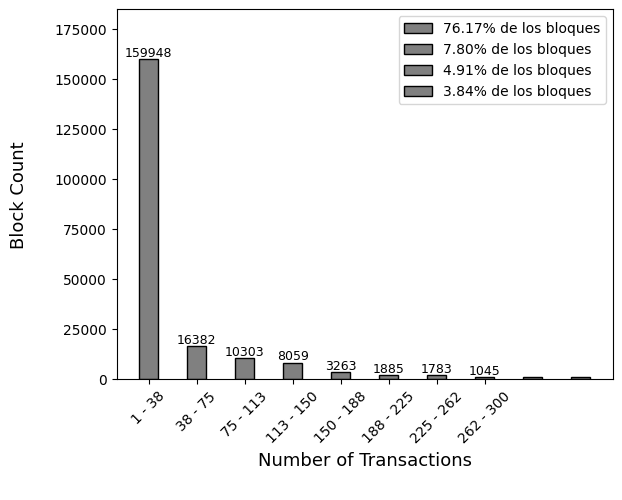

In [49]:
fig,ax =plt.subplots()  
hist, edges = np.histogram(ntx[:210000],bins=50)
#ax[0,0].set_ylim(0, 165000)    
e=[]
#i=0
for i in hist[:10]:
    e.append(f'{(i/np.sum(hist))*100:.2f}')
labels=[f'{x}% de los bloques'for x in e]

ax.bar(range(0, 10), hist[:10], color='gray',edgecolor='black',width=0.4, tick_label=labels,label=labels)
ax.set_ylabel('Block Count\n', fontsize=13)
ax.set_xlabel('Number of Transactions\n', fontsize=13)
for i, freq in enumerate(hist[:8]):
    ax.text(i, freq, str(freq), ha='center', va='bottom', fontsize=9, color='black', rotation=0)

# Etiquetas de intervalos en el eje x
interval_labels = [f'{int(edges[i])} - {int(edges[i+1])}' for i in range(len(edges)-1)]
ax.set_xticks(range(0,8))
ax.set_xticklabels(interval_labels[:8], rotation=45)
ax.set_ylim(0,185000)

legend = ax.legend(labels[:4], loc='upper right')
plt.setp(legend.get_texts(), fontsize=10)

print(e[0])

6652
13305


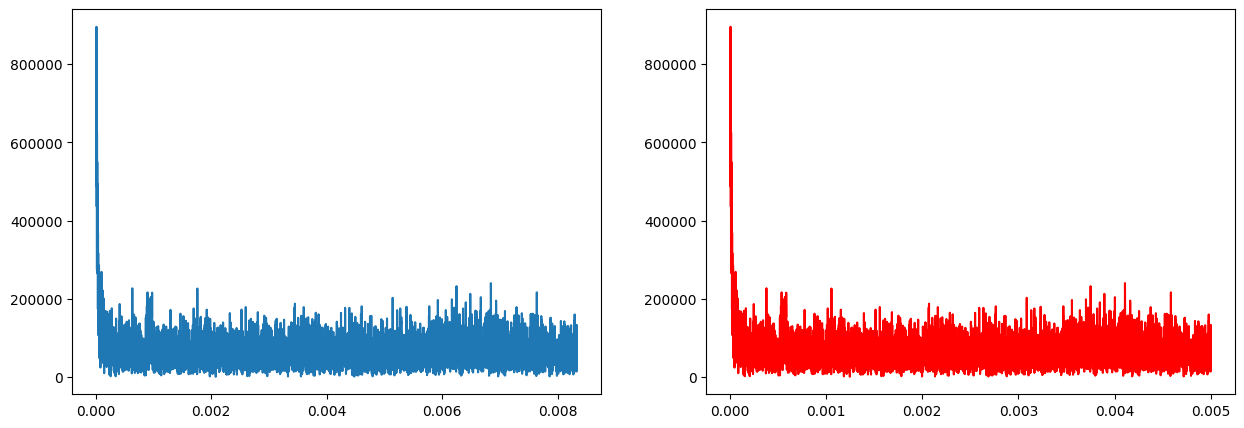

In [59]:

tiempo_segundos=(n_block-n_block[0])
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo

tiempo_equiespaciado=np.arange(tiempo_segundos[0],tiempo_segundos[-1],60)
#creamos tiempos equiespaciados
ntx_interpolado=np.interp(tiempo_equiespaciado,tiempo_segundos,ntx)
#interpolamos las transacciones
transformada=np.fft.fft(ntx_interpolado)
#trabajamos las trans interpoladas
frecuencias=np.fft.fftfreq(len(ntx_interpolado),d=(60))
frecuenciass=np.fft.fftfreq(len(ntx_interpolado),d=(100))
#TTF=transformada[transformada>0]
FRE=frecuencias[frecuencias>0]
FREQ=frecuenciass[frecuenciass>0]
print(len(FRE))
print(len(transformada))
#plt.plot(frecuencias[11000:], np.abs(transformada[11000:]), color='r')
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(FRE[10:],np.abs(transformada[10:6652]))#, np.abs(transformada[11000:]), color='r')#6652
plt.subplot(1,2,2)
plt.plot(FREQ[10:],np.abs(transformada[10:6652]),color='r')
#print(len(ntx_interpolado))
#print(tiempo_segundos[0]-tiempo_segundos[-1])
#print(tiempo_segundos[2])


6652
13305


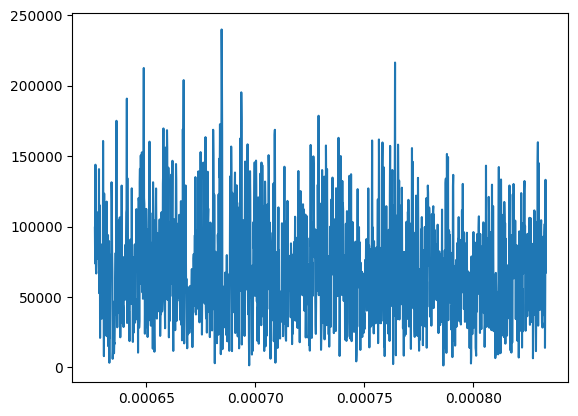

In [59]:
tiempo_segundos=(n_block-n_block[0])
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo

tiempo_equiespaciado=np.arange(tiempo_segundos[0],tiempo_segundos[-1],60)
#creamos tiempos equiespaciados
ntx_interpolado=np.interp(tiempo_equiespaciado,tiempo_segundos,ntx)
#interpolamos las transacciones
transformada=np.fft.fft(ntx_interpolado)
#trabajamos las trans interpoladas
frecuencias=np.fft.fftfreq(len(ntx_interpolado),d=(600))
#TTF=transformada[transformada>0]
FRE=frecuencias[frecuencias>0]
print(len(FRE))
print(len(transformada))
#plt.plot(frecuencias[11000:], np.abs(transformada[11000:]), color='r')
plt.plot(FRE[5000:],np.abs(transformada[5000:6652]))#, np.abs(transformada[11000:]), color='r')
#plt.fill_between(FRE[6300:],np.abs(transformada[6300:6652]))#, np.abs(transformada[11000:]), color='r')